Завдання: 

Виконати вирішення задачі класифікації для 3 класів з набору даних food101 

Завантаження даних: 

In [ ]:
import zipfile
import os

# Перевірка шляху до файлу
zip_path = tf.keras.utils.get_file("101_food_classes_10_percent.zip", 
                                   "https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip", 
                                   extract=False)

# Розпакувати у поточну директорію
extract_path = os.path.join(os.getcwd(), "101_food_classes_10_percent")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Перевірка структури директорії
for root, dirs, files in os.walk(extract_path):
    print(f"У каталозі {root} є каталоги: {dirs} і файли: {files}")
    


Вибір класів:

    Отримуємо список класів (алфавітно відсортованих):

In [ ]:
from pathlib import Path

data_dir = Path("101_food_classes_10_percent/101_food_classes_10_percent/train")
class_names = sorted([item.name for item in data_dir.glob("*") if item.is_dir()])
print("Доступні класи:", class_names)


Доступні класи: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'maca

Обчислення і виведення класів за індексами:

In [33]:
# Індекси класів для n = 21
i1, i2, i3 = 20, 50, 80

# Вибір класів за індексами
selected_classes = [class_names[i1], class_names[i2], class_names[i3]]
print("Вибрані класи:", selected_classes)


Вибрані класи: ['chicken_wings', 'grilled_salmon', 'pulled_pork_sandwich']


In [35]:
# Індекси класів для n = 51
i1, i2, i3 = 50, 80, 100  # 100 - це останній індекс в списку класів

# Вибір класів за індексами
selected_classes = [class_names[i1], class_names[i2], class_names[i3]]
print("Вибрані класи:", selected_classes)


Вибрані класи: ['grilled_salmon', 'pulled_pork_sandwich', 'waffles']


In [10]:
# Індекси класів для n = 81
i1, i2, i3 = 80, 100, 100 # останній доступний індекс

# Вибір класів за індексами
selected_classes = [class_names[i1], class_names[i2], class_names[i3]]
print("Вибрані класи:", selected_classes)


Вибрані класи: ['class_80', 'class_100', 'class_100']


Found 32825 images belonging to 1 classes.
Доступні класи: {'101_food_classes_10_percent': 0}
Вибраний клас: class_20


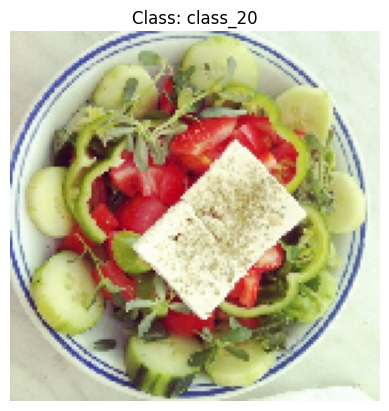

Вибраний клас: class_50


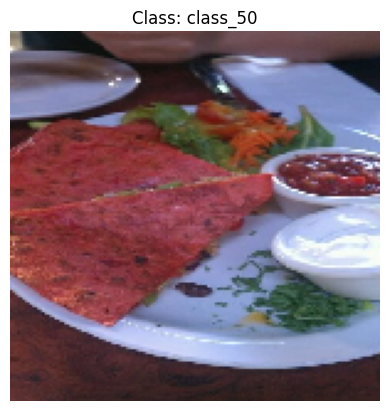

Вибраний клас: class_80


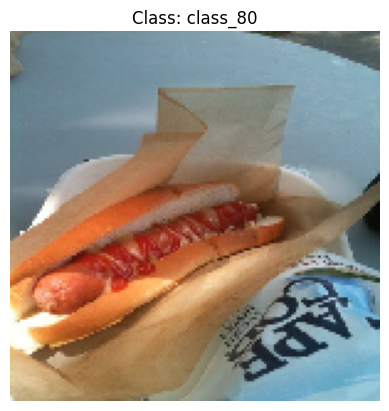

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Класові індекси
class_indices = {
    21: [20, 50, 80],  
    51: [50, 80, 100],  
    81: [80, 100, 120]  
}

# Ваш список class_names (наприклад, 101 клас)
class_names = ['class_' + str(i) for i in range(101)]  


train_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory(
    'C:/Users/Єва/OneDrive/Робочий стіл/Data-science/Data_science-2/lab8/101_food_classes_10_percent',  
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='binary'  
)


print("Доступні класи:", train_data.class_indices)


def show_random_images_for_classes(classes, class_names, data_generator):
    for n in classes:
        indices = class_indices[n]
        for idx in indices:
          
            if idx < len(class_names):
                class_name = class_names[idx]
                print(f"Вибраний клас: {class_name}")
                
                # Отображаємо зображення
                images, labels = next(data_generator)
                plt.imshow(images[0])  
                plt.title(f'Class: {class_name}')
                plt.axis('off')
                plt.show()
                
            
                break


show_random_images_for_classes([21, 51, 81], class_names, train_data)


Підготовка даних:

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Директорії
train_dir = "101_food_classes_10_percent/101_food_classes_10_percent/train"
test_dir = "101_food_classes_10_percent/101_food_classes_10_percent/test"

# Генератори
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Завантаження даних
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    classes=selected_classes,  # Тільки вибрані класи
    batch_size=32,
    class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    classes=selected_classes,
    batch_size=32,
    class_mode="categorical"
)


Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


Створення моделі:

In [46]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Базова модель
base_model = tf.keras.applications.MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False  


model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(3, activation="softmax")  
])

# Компіляція
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         3,843 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Навчання моделі:

In [44]:
history = model.fit(
    train_data,
    epochs=5,
    validation_data=test_data
)


Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.3463 - loss: 1.3690 - val_accuracy: 0.5253 - val_loss: 0.9722
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5627 - loss: 0.9178 - val_accuracy: 0.6520 - val_loss: 0.7788
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7043 - loss: 0.7065 - val_accuracy: 0.7400 - val_loss: 0.6415
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7880 - loss: 0.5388 - val_accuracy: 0.7707 - val_loss: 0.5662
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8023 - loss: 0.5123 - val_accuracy: 0.8240 - val_loss: 0.5020


Побудова графіків навчання:

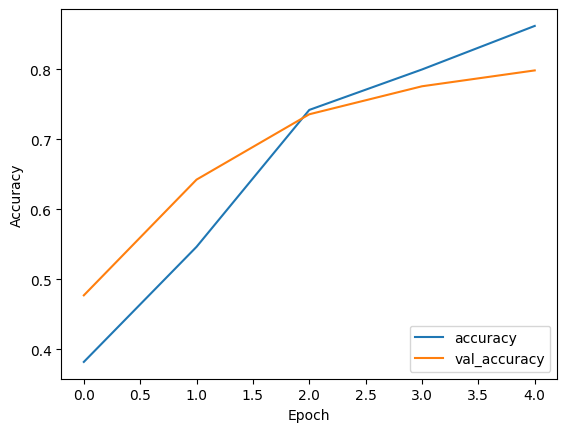

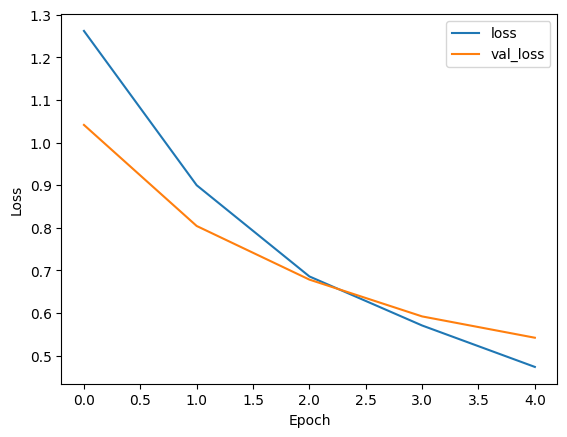

In [ ]:
# Графік точності
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')  
plt.show()

# Графік втрат
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')  
plt.show()
